## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import seaborn as sns
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import power_transform
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    ConfusionMatrixDisplay,
    accuracy_score, 
    precision_score, 
    recall_score
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
    StratifiedKFold
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

## Read Dataset

In [2]:
df = pd.read_csv(".../Dataset/Transformed Data.csv")
print(df.shape)
df.head()

(18900, 20)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area3,Wilderness_Area4,Soil_Type3,Soil_Type4,Soil_Type10,Soil_Type23,Soil_Type29,Soil_Type30,Soil_Type32,Cover_Type
0,0.488750,0.242953,1.579103,-0.242440,-0.103541,0.840184,0.856814,-2.074582,-2.035292,0.828308,1,0,0,0,0,0,0,0,0,1
1,0.923949,0.924811,-1.243057,-0.080129,-0.914803,-0.563925,-0.384762,0.664501,0.749468,-0.029120,0,0,0,0,0,1,0,0,0,1
2,1.301760,0.543035,0.285613,0.287345,-0.751288,1.380650,0.547494,-1.044093,-0.969251,1.453142,1,0,0,0,0,1,0,0,0,1
3,0.503097,0.767480,-1.125467,-0.680049,-0.820478,1.037096,0.285514,0.232543,0.075034,-0.038221,1,0,0,0,0,0,0,0,0,1
4,1.220459,-1.652851,-1.007877,0.835735,0.226095,0.818457,0.212150,1.266796,0.531908,0.212173,1,0,0,0,0,0,0,0,0,1


In [29]:
features = df.drop(columns=["Cover_Type"])
cover_type = df["Cover_Type"]

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type3', 'Soil_Type4', 'Soil_Type10',
       'Soil_Type23', 'Soil_Type29', 'Soil_Type30', 'Soil_Type32'],
      dtype='object')

In [4]:
subset1 = [
    "Elevation",
    "Horizontal_Distance_To_Roadways",
    "Horizontal_Distance_To_Fire_Points",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Hillshade_9am",
    "Aspect",
    "Hillshade_Noon",
    "Hillshade_3pm",
    "Wilderness_Area4"
]

subset2 = [
    "Elevation",
    "Horizontal_Distance_To_Roadways",
    "Horizontal_Distance_To_Fire_Points",
    "Horizontal_Distance_To_Hydrology",
    "Hillshade_9am",
    "Aspect"
]

features_10 = features[subset1]
features_6 = features[subset2]

## 5-fold Cross-validation performance 

In [5]:
## Classification Tree - with all features
ctree = DecisionTreeClassifier(random_state = 447)
ctree.fit(features, cover_type)
ctree_scores = cross_validate(ctree, features, cover_type, cv=5, scoring="accuracy") ## accuracy as performance measurement
ctree_scores = pd.DataFrame(ctree_scores)
ctree_scores.loc['Average'] = ctree_scores.mean()
ctree_scores

,fit_time,score_time,test_score
0,0.133101,0.004428,0.783069
1,0.130909,0.002527,0.783598
2,0.126945,0.002310,0.783862
3,0.130678,0.002395,0.788095
4,0.137788,0.002281,0.767989
Average,0.131884,0.002788,0.781323


In [6]:
## Classification Tree - with 10 features
ctree = DecisionTreeClassifier(random_state = 447)
ctree.fit(features, cover_type)
ctree_scores = cross_validate(ctree, features_10, cover_type, cv=5, scoring="accuracy") ## accuracy as performance measurement
ctree_scores = pd.DataFrame(ctree_scores)
ctree_scores.loc['Average'] = ctree_scores.mean()
ctree_scores

,fit_time,score_time,test_score
0,0.124507,0.002633,0.774074
1,0.120487,0.002535,0.762963
2,0.117871,0.002303,0.757143
3,0.114801,0.002359,0.760582
4,0.113626,0.002160,0.768783
Average,0.118259,0.002398,0.764709


In [7]:
## Random Forest - with all features
rf =  RandomForestClassifier(random_state=447, n_jobs=-1)
rf.fit(features, cover_type)
rf_scores = cross_validate(rf, features, cover_type, cv=5, scoring="accuracy") ## accuracy as performance measurement
rf_scores = pd.DataFrame(rf_scores)
rf_scores.loc['Average'] = rf_scores.mean()
rf_scores

,fit_time,score_time,test_score
0,2.503046,0.058160,0.860053
1,0.824302,0.048797,0.859788
2,0.808209,0.041302,0.860317
3,0.825941,0.049626,0.867460
4,0.827669,0.043702,0.856085
Average,1.157833,0.048317,0.860741


In [8]:
## Random Forest - with 10 features
rf =  RandomForestClassifier(random_state=447, n_jobs=-1)
rf.fit(features, cover_type)
rf_scores = cross_validate(rf, features_10, cover_type, cv=5, scoring="accuracy") ## accuracy as performance measurement
rf_scores = pd.DataFrame(rf_scores)
rf_scores.loc['Average'] = rf_scores.mean()
rf_scores

,fit_time,score_time,test_score
0,0.753086,0.032725,0.842328
1,0.750334,0.032433,0.850794
2,0.776399,0.031621,0.848942
3,0.777304,0.039234,0.853175
4,0.763534,0.033412,0.844180
Average,0.764131,0.033885,0.847884


## Hyperparameter optimization for KNN Classifier

In [9]:
## Find the optimal n_neighbors using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
knn = KNeighborsClassifier()
param_grid_knn = {
    "n_neighbors": np.arange(1, 50, 2)
}
random_search_knn = RandomizedSearchCV(
    knn, param_distributions=param_grid_knn, n_jobs=-1, n_iter=20, cv=5, random_state=447, scoring="accuracy"
)
random_search_knn.fit(features, cover_type)
print("Best K: ", random_search_knn.best_params_)

Best K:  {'n_neighbors': 1}


In [10]:
## Find the optimal n_neighbors using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 50, 2)}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(features, cover_type)
print("Best K: ", grid_search_knn.best_params_)

Best K:  {'n_neighbors': 1}


In [11]:
## KNN Classifier - with all features
knn = KNeighborsClassifier(n_neighbors = 1)
knn_scores = cross_validate(knn, features, cover_type, cv=5, scoring="accuracy")
knn_scores = pd.DataFrame(knn_scores)
knn_scores.loc['Average'] = knn_scores.mean()
knn_scores

,fit_time,score_time,test_score
0,0.008632,0.223440,0.795238
1,0.008399,0.194202,0.798148
2,0.006849,0.206186,0.789153
3,0.007214,0.192718,0.801323
4,0.006963,0.189074,0.796561
Average,0.007611,0.201124,0.796085


In [12]:
## KNN Classifier - with 10 features
knn = KNeighborsClassifier(n_neighbors = 1)
knn_scores = cross_validate(knn, features_10, cover_type, cv=5, scoring="accuracy")
knn_scores = pd.DataFrame(knn_scores)
knn_scores.loc['Average'] = knn_scores.mean()
knn_scores

,fit_time,score_time,test_score
0,0.020907,0.184065,0.771958
1,0.011875,0.171418,0.785714
2,0.012522,0.157488,0.780423
3,0.011495,0.164189,0.780688
4,0.011078,0.154708,0.778042
Average,0.013575,0.166374,0.779365


In [13]:
## Naive Bayes Classifier - with all features
nbc = GaussianNB()
nbc.fit(features, cover_type)
nbc_scores = cross_validate(nbc, features, cover_type, cv=5, scoring="accuracy") ## accuracy as performance measurement
nbc_scores = pd.DataFrame(nbc_scores)
nbc_scores.loc['Average'] = nbc_scores.mean()
nbc_scores

,fit_time,score_time,test_score
0,0.017863,0.013883,0.451058
1,0.008883,0.006980,0.442857
2,0.008639,0.004434,0.438889
3,0.008111,0.003760,0.439683
4,0.008346,0.003754,0.440212
Average,0.010368,0.006562,0.442540


In [14]:
## Naive Bayes Classifier - with 10 features
nbc = GaussianNB()
nbc.fit(features, cover_type)
nbc_scores = cross_validate(nbc, features_10, cover_type, cv=5, scoring="accuracy") ## accuracy as performance measurement
nbc_scores = pd.DataFrame(nbc_scores)
nbc_scores.loc['Average'] = nbc_scores.mean()
nbc_scores

,fit_time,score_time,test_score
0,0.015935,0.004006,0.498942
1,0.008202,0.004130,0.502646
2,0.006708,0.003319,0.491005
3,0.008100,0.003443,0.500794
4,0.006485,0.003416,0.498148
Average,0.009086,0.003663,0.498307


In [15]:
## Naive Bayes Classifier - with 6 features
nbc = GaussianNB()
nbc.fit(features, cover_type)
nbc_scores = cross_validate(nbc, features_6, cover_type, cv=5, scoring="accuracy") ## accuracy as performance measurement
nbc_scores = pd.DataFrame(nbc_scores)
nbc_scores.loc['Average'] = nbc_scores.mean()
nbc_scores

,fit_time,score_time,test_score
0,0.009847,0.002988,0.626984
1,0.005925,0.003167,0.629630
2,0.006125,0.002800,0.632011
3,0.006242,0.002541,0.626984
4,0.004630,0.002146,0.630688
Average,0.006554,0.002729,0.629259


Random Forest appears to have the best test score, while Naive Bayes Classifier has the least test score. In this case, random forest seems to be the best model, but it has a train score of 1 at the same time, which means the model will likely to overfit. 

## Out-of-sample performance

In [16]:
## Split data into train and test.
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123) ## 70% train data and 30% test data
X_train = train_df.drop(columns=["Cover_Type"])
X_test = test_df.drop(columns=["Cover_Type"])
y_train = train_df["Cover_Type"]
y_test = test_df["Cover_Type"]
features = X_train.columns.to_list()

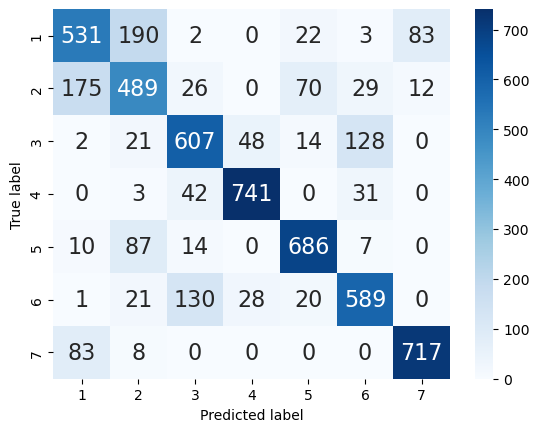

              precision    recall  f1-score   support

           1       0.66      0.64      0.65       831
           2       0.60      0.61      0.60       801
           3       0.74      0.74      0.74       820
           4       0.91      0.91      0.91       817
           5       0.84      0.85      0.85       804
           6       0.75      0.75      0.75       789
           7       0.88      0.89      0.89       808

    accuracy                           0.77      5670
   macro avg       0.77      0.77      0.77      5670
weighted avg       0.77      0.77      0.77      5670



In [17]:
## Classification tree with all features
ctree = DecisionTreeClassifier(random_state = 447)
ctree.fit(X_train, y_train)
ctree_accuracy = ctree.score(X_test, y_test)
y_pred = ctree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm,
    annot=True,
    cmap='Blues',
    fmt='g',
    annot_kws={'fontsize': 16},
    xticklabels=['1','2','3','4','5','6','7'],
    yticklabels=['1','2','3','4','5','6','7']
)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
print(classification_report(y_test, y_pred))

As we can see from the classification matrix report, Forest cover type 4 (Cottonwood-Willow) has highest precision, recall and f1-score while cover type 2 (Lodgepole Pine) has the lowest highest precision, recall and f1-score. This implies that it's pretty hard to discriminate cover type 2 in real life.

## Holdout set prediction intervals

In [18]:
## Prediction intervals for a categorical response
## prob_matrix: a probability matrix of dimension nxJ, J = # categories, each row is a probability mass function
## labels: a vector of length J, with short names for categories
## This code is a modified version from lecture notes stat447-classification-predintervals.pdf in Python.
def category_pred_interval(prob_matrix, labels):
    ncases = prob_matrix.shape[0] 
    pred50 = [None] * ncases
    pred80 = [None] * ncases
    
    for i in range(ncases):
        p = prob_matrix[i, :]
        ip = np.argsort(p)[::-1]  
        p_ordered = p[ip] # decreasing order
        labels_ordered = np.array(labels)[ip] # decreasing order
        G = np.cumsum(p_ordered)   # cumulative sum from largest
        k1 = np.min(np.where(G >= 0.5))  # level1 = 0.5
        k2 = np.min(np.where(G >= 0.8))  # level2 = 0.8
        pred1 = labels_ordered[:k1 + 1]
        pred2 = labels_ordered[:k2 + 1]
        pred50[i] = "".join(map(str, pred1))
        pred80[i] = "".join(map(str, pred2))
    return {"pred50": pred50, "pred80": pred80}

In [19]:
## Classification tree holdout set prediction intervals
prob_matrix = ctree.predict_proba(X_test)
prob_matrix
labels = ctree.classes_
intervals = category_pred_interval(prob_matrix, labels)
pred50 = intervals["pred50"]
pred80 = intervals["pred80"]
# Create a DataFrame with the true labels and the predicted 50% interval
data50 = {'True_Labels': y_test, 'Pred50': pred50}
data80 = {'True_Labels': y_test, 'Pred80': pred80}
df50 = pd.DataFrame(data50)
df80 = pd.DataFrame(data80)
cross_tab50 = pd.crosstab(df50['True_Labels'], df50['Pred50'])
print("50% Prediction Interval:")
print(cross_tab50)

# Calculate cross-tabulation for 80% interval
cross_tab80 = pd.crosstab(df80['True_Labels'], df80['Pred80'])
print("80% Prediction Interval:")
print(cross_tab80)

50% Prediction Interval:
Pred50         1    2    3    4    5    6    7
True_Labels                                   
1            531  190    2    0   22    3   83
2            175  489   26    0   70   29   12
3              2   21  607   48   14  128    0
4              0    3   42  741    0   31    0
5             10   87   14    0  686    7    0
6              1   21  130   28   20  589    0
7             83    8    0    0    0    0  717
80% Prediction Interval:
Pred80         1    2    3    4    5    6    7
True_Labels                                   
1            531  190    2    0   22    3   83
2            175  489   26    0   70   29   12
3              2   21  607   48   14  128    0
4              0    3   42  741    0   31    0
5             10   87   14    0  686    7    0
6              1   21  130   28   20  589    0
7             83    8    0    0    0    0  717


Based on 50% prediction interval, cover type 1 has a misclassification rate of 
As we can see from the classification matrix report, Forest cover type 4 (Cottonwood-Willow) has highest precision, recall and f1-score while cover type 2 (Lodgepole Pine) has the lowest highest precision, recall and f1-score. This implies that it's pretty hard to discriminate cover type 2 in real life.

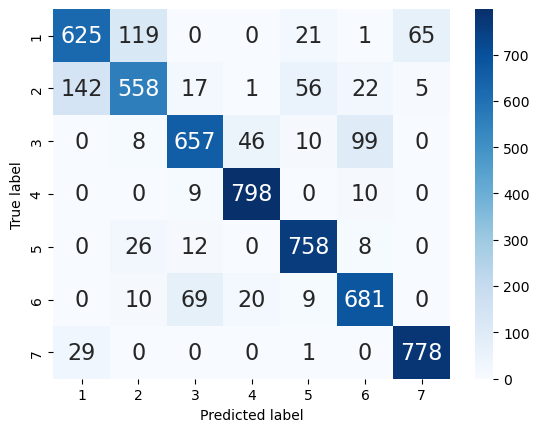

              precision    recall  f1-score   support

           1       0.79      0.75      0.77       831
           2       0.77      0.70      0.73       801
           3       0.86      0.80      0.83       820
           4       0.92      0.98      0.95       817
           5       0.89      0.94      0.91       804
           6       0.83      0.86      0.85       789
           7       0.92      0.96      0.94       808

    accuracy                           0.86      5670
   macro avg       0.85      0.86      0.85      5670
weighted avg       0.85      0.86      0.85      5670



In [20]:
## Random forest with all features
rf =  RandomForestClassifier(random_state=447, n_jobs=-1)
rf.fit(X_train, y_train)
rf_accuracy = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm1,
    annot=True,
    cmap='Blues',
    fmt='g',
    annot_kws={'fontsize': 16},
    xticklabels=['1','2','3','4','5','6','7'],
    yticklabels=['1','2','3','4','5','6','7']
)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print(classification_report(y_test, y_pred))

As we can see from the classification matrix report, Forest cover type 4 (Cottonwood-Willow) has highest precision, recall and f1-score while cover type 2 (Lodgepole Pine) has the lowest highest precision, recall and f1-score. This implies that it's pretty hard to discriminate cover type 2 in real life. The accuracy of random forest is 0.85 which is better than classification tree.

In [21]:
## Random Forest holdout set prediction intervals
pd.set_option('display.max_columns', 150)
prob_matrix = rf.predict_proba(X_test)
labels = rf.classes_
intervals = category_pred_interval(prob_matrix, labels)
pred50 = intervals["pred50"]
pred80 = intervals["pred80"]
# Create a DataFrame with the true labels and the predicted 50% interval
data50 = {'True_Labels': y_test, 'Pred50': pred50}
data80 = {'True_Labels': y_test, 'Pred80': pred80}
df50 = pd.DataFrame(data50)
df80 = pd.DataFrame(data80)
cross_tab50 = pd.crosstab(df50['True_Labels'], df50['Pred50'])
print("50% Prediction Interval:")
print(cross_tab50)

# Calculate cross-tabulation for 80% interval
cross_tab80 = pd.crosstab(df80['True_Labels'], df80['Pred80'])
print("80% Prediction Interval:")
print(cross_tab80)

50% Prediction Interval:
Pred50         1  12  15  17    2  21  23  235  25  26  27    3  32  34  35  \
True_Labels                                                                   
1            554  38   3  24   87  33   0    0   1   1   0    0   0   0   0   
2             95  34   2   7  468  42   6    0  36   5   1    5   4   0   2   
3              0   0   0   0    0   0   4    1   2   0   0  608   7   6   6   
4              0   0   0   0    0   0   0    0   0   0   0    3   0   4   0   
5              0   0   0   0   11   3   0    0  11   0   0    5   0   0   6   
6              0   0   0   0    1   0   1    0   3   4   0   44   1   3   1   
7             17   2   0   7    0   0   0    0   0   0   0    0   0   0   0   

Pred50       36  37    4  43  46    5  51  52  53  56    6  62  63  64  65  \
True_Labels                                                                  
1             0   0    0   0   0   15   2   4   0   0    1   0   0   0   0   
2             4   1    1   0 

## Naive Bayes Classifier: Out-of-sample Accuracy 

In [22]:
## Naive Bayes Classifier with all features
nbc = GaussianNB()
nbc.fit(X_train, y_train)
nbc_accuracy = nbc.score(X_test, y_test)

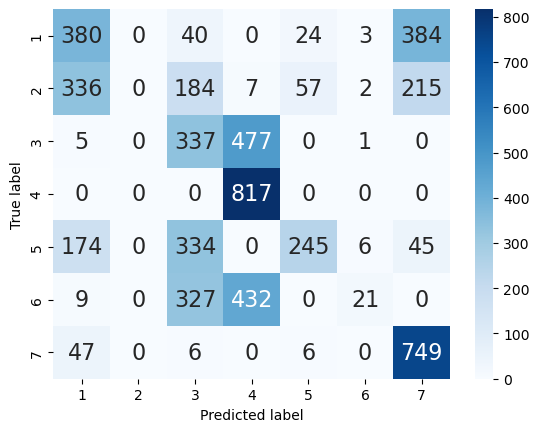

              precision    recall  f1-score   support

           1       0.40      0.46      0.43       831
           2       0.00      0.00      0.00       801
           3       0.27      0.41      0.33       820
           4       0.47      1.00      0.64       817
           5       0.74      0.30      0.43       804
           6       0.64      0.03      0.05       789
           7       0.54      0.93      0.68       808

    accuracy                           0.45      5670
   macro avg       0.44      0.45      0.37      5670
weighted avg       0.44      0.45      0.37      5670



/Users/changlingchen/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/changlingchen/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/changlingchen/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [23]:
y_pred = nbc.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm2,
    annot=True,
    cmap='Blues',
    fmt='g',
    annot_kws={'fontsize': 16},
    xticklabels=['1','2','3','4','5','6','7'],
    yticklabels=['1','2','3','4','5','6','7']
)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print(classification_report(y_test, y_pred))

In [24]:
## Naive Bayes Classifier holdout set prediction intervals
prob_matrix = nbc.predict_proba(X_test)
labels = nbc.classes_
intervals = category_pred_interval(prob_matrix, labels)
pred50 = intervals["pred50"]
pred80 = intervals["pred80"]
# Create a DataFrame with the true labels and the predicted 50% interval
data50 = {'True_Labels': y_test, 'Pred50': pred50}
data80 = {'True_Labels': y_test, 'Pred80': pred80}
df50 = pd.DataFrame(data50)
df80 = pd.DataFrame(data80)
cross_tab50 = pd.crosstab(df50['True_Labels'], df50['Pred50'])
print("50% Prediction Interval:")
print(cross_tab50)

# Calculate cross-tabulation for 80% interval
cross_tab80 = pd.crosstab(df80['True_Labels'], df80['Pred80'])
print("80% Prediction Interval:")
print(cross_tab80)

50% Prediction Interval:
Pred50         1  13  15  16  17    3  31  36  37    4    5  51  53  56   6  \
True_Labels                                                                   
1            378   1   0   0   1   39   0   1   0    0   23   0   0   1   3   
2            332   2   0   1   1  182   2   0   0    7   57   0   0   0   2   
3              5   0   0   0   0  337   0   0   0  477    0   0   0   0   1   
4              0   0   0   0   0    0   0   0   0  817    0   0   0   0   0   
5            169   1   3   0   1  326   4   0   4    0  242   2   1   0   6   
6              9   0   0   0   0  327   0   0   0  432    0   0   0   0  21   
7             47   0   0   0   0    6   0   0   0    0    6   0   0   0   0   

Pred50         7  71  73  
True_Labels               
1            381   1   2  
2            210   4   1  
3              0   0   0  
4              0   0   0  
5             42   0   3  
6              0   0   0  
7            749   0   0  
80% Prediction Inter

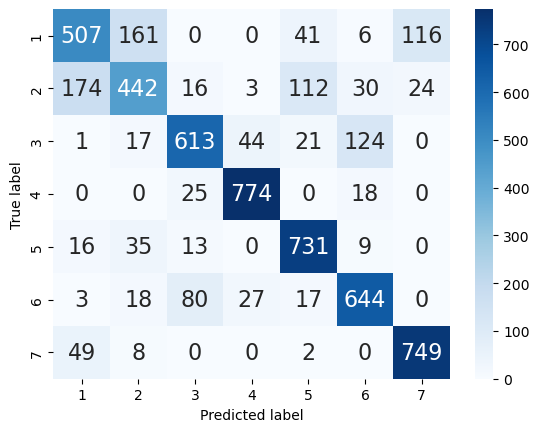

              precision    recall  f1-score   support

           1       0.68      0.61      0.64       831
           2       0.65      0.55      0.60       801
           3       0.82      0.75      0.78       820
           4       0.91      0.95      0.93       817
           5       0.79      0.91      0.85       804
           6       0.77      0.82      0.80       789
           7       0.84      0.93      0.88       808

    accuracy                           0.79      5670
   macro avg       0.78      0.79      0.78      5670
weighted avg       0.78      0.79      0.78      5670



In [25]:
## KNN Classifier - with all features
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn_accuracy = knn.score(X_test, y_test)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm,
    annot=True,
    cmap='Blues',
    fmt='g',
    annot_kws={'fontsize': 16},
    xticklabels=['1','2','3','4','5','6','7'],
    yticklabels=['1','2','3','4','5','6','7']
)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
print(classification_report(y_test, y_pred))

As we can see from the classification matrix report, Forest cover type 4 (Cottonwood-Willow) has highest precision, recall and f1-score while cover type 2 (Lodgepole Pine) has the lowest highest precision, recall and f1-score. This implies that it's pretty hard to discriminate cover type 2 in real life.

In [26]:
## KNN Classifier holdout set prediction intervals
prob_matrix = knn.predict_proba(X_test)
labels = knn.classes_
intervals = category_pred_interval(prob_matrix, labels)
pred50 = intervals["pred50"]
pred80 = intervals["pred80"]
# Create a DataFrame with the true labels and the predicted 50% interval
data50 = {'True_Labels': y_test, 'Pred50': pred50}
data80 = {'True_Labels': y_test, 'Pred80': pred80}
df50 = pd.DataFrame(data50)
df80 = pd.DataFrame(data80)
cross_tab50 = pd.crosstab(df50['True_Labels'], df50['Pred50'])
print("50% Prediction Interval:")
print(cross_tab50)

# Calculate cross-tabulation for 80% interval
cross_tab80 = pd.crosstab(df80['True_Labels'], df80['Pred80'])
print("80% Prediction Interval:")
print(cross_tab80)

50% Prediction Interval:
Pred50         1    2    3    4    5    6    7
True_Labels                                   
1            507  161    0    0   41    6  116
2            174  442   16    3  112   30   24
3              1   17  613   44   21  124    0
4              0    0   25  774    0   18    0
5             16   35   13    0  731    9    0
6              3   18   80   27   17  644    0
7             49    8    0    0    2    0  749
80% Prediction Interval:
Pred80         1    2    3    4    5    6    7
True_Labels                                   
1            507  161    0    0   41    6  116
2            174  442   16    3  112   30   24
3              1   17  613   44   21  124    0
4              0    0   25  774    0   18    0
5             16   35   13    0  731    9    0
6              3   18   80   27   17  644    0
7             49    8    0    0    2    0  749


As we can see from the classification matrix report, Forest cover type 7 (Krummholz) has highest precision, recall and f1-score while cover type 1 (Spruce-fir) has the least highest precision, recall and f1-score. This implies that it's pretty hard to discriminate cover type 1 in real life. The accuracy of Naive Bayes Classifier is 0.59 which is much worse than classification tree and random forest. Recall that, there is Multicollinearity between features which might impact the accuracy of Naive Bayes Classifier.

## Feature importance 

In [32]:
importances = rf.feature_importances_
feature_names = features.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
print(importance_df.sort_values(by='importance', ascending=False))

                               feature  importance
0                            Elevation    0.300703
5      Horizontal_Distance_To_Roadways    0.105545
9   Horizontal_Distance_To_Fire_Points    0.082360
3     Horizontal_Distance_To_Hydrology    0.069572
4       Vertical_Distance_To_Hydrology    0.058325
1                               Aspect    0.055419
6                        Hillshade_9am    0.053214
8                        Hillshade_3pm    0.048192
7                       Hillshade_Noon    0.044661
11                    Wilderness_Area4    0.042516
2                                Slope    0.037533
14                         Soil_Type10    0.023244
10                    Wilderness_Area3    0.021717
12                          Soil_Type3    0.019237
13                          Soil_Type4    0.011263
17                         Soil_Type30    0.008843
16                         Soil_Type29    0.006588
18                         Soil_Type32    0.005728
15                         Soil

Extract the most important features: We will be using a threshold of 0.01 to fetch the important features only.

In [65]:
essential_features = [
    "Elevation",
    "Horizontal_Distance_To_Roadways",
    "Horizontal_Distance_To_Fire_Points",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Hillshade_9am",
    "Aspect",
    "Hillshade_Noon",
    "Hillshade_3pm",
    "Wilderness_Area4",
    "Slope",
    "Soil_Type10",
    "Wilderness_Area3",
    "Soil_Type3",                                          
    "Soil_Type4"
]

X_ess_train = X_train[subset2]
X_ess_test = X_test[subset2]

## Models with a subset of features

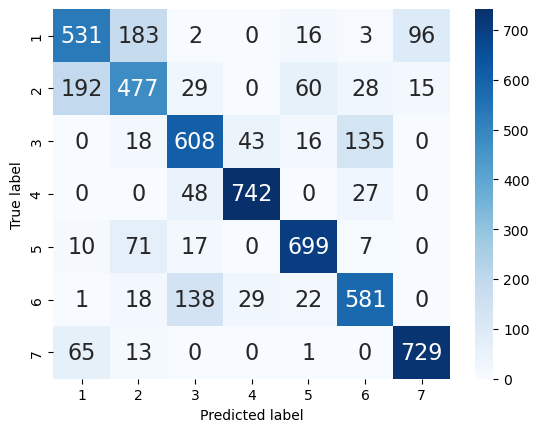

              precision    recall  f1-score   support

           1       0.66      0.64      0.65       831
           2       0.61      0.60      0.60       801
           3       0.72      0.74      0.73       820
           4       0.91      0.91      0.91       817
           5       0.86      0.87      0.86       804
           6       0.74      0.74      0.74       789
           7       0.87      0.90      0.88       808

    accuracy                           0.77      5670
   macro avg       0.77      0.77      0.77      5670
weighted avg       0.77      0.77      0.77      5670



In [81]:
## Classification tree with a subset of features
ctree = DecisionTreeClassifier(random_state = 447)
ctree.fit(X_ess_train, y_train)
ctree_accuracy = ctree.score(X_ess_test, y_test)
y_pred = ctree.predict(X_ess_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm,
    annot=True,
    cmap='Blues',
    fmt='g',
    annot_kws={'fontsize': 16},
    xticklabels=['1','2','3','4','5','6','7'],
    yticklabels=['1','2','3','4','5','6','7']
)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
print(classification_report(y_test, y_pred))

In [85]:
## Classification tree holdout set prediction intervals
prob_matrix = ctree.predict_proba(X_ess_test)
labels = ctree.classes_
intervals = category_pred_interval(prob_matrix, labels)
pred50 = intervals["pred50"]
pred80 = intervals["pred80"]
# Create a DataFrame with the true labels and the predicted 50% interval
data50 = {'True_Labels': y_test, 'Pred50': pred50}
data80 = {'True_Labels': y_test, 'Pred80': pred80}
df50 = pd.DataFrame(data50)
df80 = pd.DataFrame(data80)
cross_tab50 = pd.crosstab(df50['True_Labels'], df50['Pred50'])
print("50% Prediction Interval:")
print(cross_tab50)

# Calculate cross-tabulation for 80% interval
cross_tab80 = pd.crosstab(df80['True_Labels'], df80['Pred80'])
print("80% Prediction Interval:")
print(cross_tab80)

50% Prediction Interval:
Pred50         1    2    3    4    5    6    7
True_Labels                                   
1            531  183    2    0   16    3   96
2            192  477   29    0   60   28   15
3              0   18  608   43   16  135    0
4              0    0   48  742    0   27    0
5             10   71   17    0  699    7    0
6              1   18  138   29   22  581    0
7             65   13    0    0    1    0  729
80% Prediction Interval:
Pred80         1    2    3    4    5    6    7
True_Labels                                   
1            531  183    2    0   16    3   96
2            192  477   29    0   60   28   15
3              0   18  608   43   16  135    0
4              0    0   48  742    0   27    0
5             10   71   17    0  699    7    0
6              1   18  138   29   22  581    0
7             65   13    0    0    1    0  729


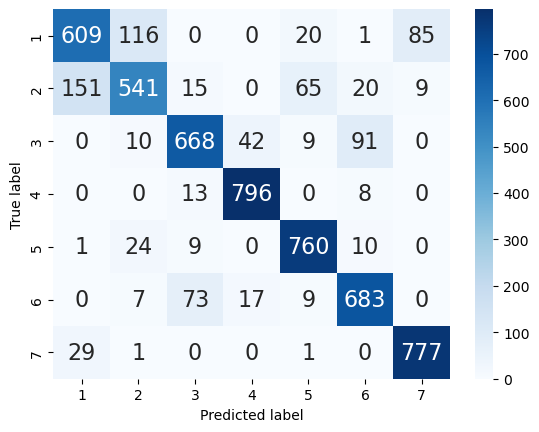

              precision    recall  f1-score   support

           1       0.77      0.73      0.75       831
           2       0.77      0.68      0.72       801
           3       0.86      0.81      0.84       820
           4       0.93      0.97      0.95       817
           5       0.88      0.95      0.91       804
           6       0.84      0.87      0.85       789
           7       0.89      0.96      0.93       808

    accuracy                           0.85      5670
   macro avg       0.85      0.85      0.85      5670
weighted avg       0.85      0.85      0.85      5670



In [ ]:
## Random forest with a subset of features
rf =  RandomForestClassifier(random_state=447, n_jobs=-1)
rf.fit(X_ess_train, y_train)
rf_accuracy = rf.score(X_ess_test, y_test)
y_pred = rf.predict(X_ess_test)
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm1,
    annot=True,
    cmap='Blues',
    fmt='g',
    annot_kws={'fontsize': 16},
    xticklabels=['1','2','3','4','5','6','7'],
    yticklabels=['1','2','3','4','5','6','7']
)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print(classification_report(y_test, y_pred))

In [86]:
pd.set_option('display.max_columns', 150)
prob_matrix = rf.predict_proba(X_ess_test)
labels = rf.classes_
intervals = category_pred_interval(prob_matrix, labels)
pred50 = intervals["pred50"]
pred80 = intervals["pred80"]
# Create a DataFrame with the true labels and the predicted 50% interval
data50 = {'True_Labels': y_test, 'Pred50': pred50}
data80 = {'True_Labels': y_test, 'Pred80': pred80}
df50 = pd.DataFrame(data50)
df80 = pd.DataFrame(data80)
cross_tab50 = pd.crosstab(df50['True_Labels'], df50['Pred50'])
print("50% Prediction Interval:")
print(cross_tab50)

# Calculate cross-tabulation for 80% interval
cross_tab80 = pd.crosstab(df80['True_Labels'], df80['Pred80'])
print("80% Prediction Interval:")
print(cross_tab80)

50% Prediction Interval:
Pred50         1  12  15  16  17    2  21  23  25  26  27    3  32  34  35  \
True_Labels                                                                  
1            537  47   1   0  19   87  23   0   9   1   0    0   0   0   0   
2            109  28   2   1   5  443  49   6  33  10   1    8   1   0   4   
3              0   0   0   0   0    0   0   7   3   0   0  618   4   5   8   
4              0   0   0   0   0    0   0   0   0   0   0    4   0   3   0   
5              0   1   0   0   0   15   0   0   8   0   0    6   0   0   1   
6              0   0   0   0   0    2   0   2   1   1   0   54   0   2   0   
7             19   2   0   0   6    0   0   0   0   0   1    0   0   0   0   

Pred50       36    4  43  46    5  51  52  53  56    6  62  63  64  65    7  \
True_Labels                                                                   
1             0    0   0   0   13   2   5   0   0    1   0   0   0   0   67   
2             2    0   0   0   35  

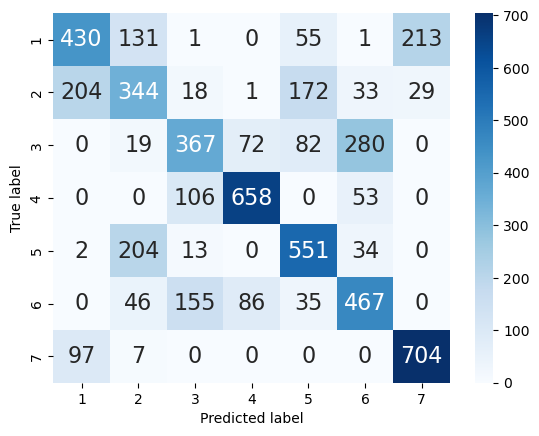

              precision    recall  f1-score   support

           1       0.59      0.52      0.55       831
           2       0.46      0.43      0.44       801
           3       0.56      0.45      0.50       820
           4       0.81      0.81      0.81       817
           5       0.62      0.69      0.65       804
           6       0.54      0.59      0.56       789
           7       0.74      0.87      0.80       808

    accuracy                           0.62      5670
   macro avg       0.61      0.62      0.62      5670
weighted avg       0.62      0.62      0.62      5670



In [66]:
## Naive Bayes Classifier with a subset of features
nbc = GaussianNB()
nbc.fit(X_ess_train, y_train)
nbc_accuracy = nbc.score(X_ess_test, y_test)
y_pred = nbc.predict(X_ess_test)
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm2,
    annot=True,
    cmap='Blues',
    fmt='g',
    annot_kws={'fontsize': 16},
    xticklabels=['1','2','3','4','5','6','7'],
    yticklabels=['1','2','3','4','5','6','7']
)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print(classification_report(y_test, y_pred))

In [67]:
prob_matrix = nbc.predict_proba(X_ess_test)
labels = nbc.classes_
intervals = category_pred_interval(prob_matrix, labels)
pred50 = intervals["pred50"]
pred80 = intervals["pred80"]
# Create a DataFrame with the true labels and the predicted 50% interval
data50 = {'True_Labels': y_test, 'Pred50': pred50}
data80 = {'True_Labels': y_test, 'Pred80': pred80}
df50 = pd.DataFrame(data50)
df80 = pd.DataFrame(data80)
cross_tab50 = pd.crosstab(df50['True_Labels'], df50['Pred50'])
print("50% Prediction Interval:")
print(cross_tab50)

# Calculate cross-tabulation for 80% interval
cross_tab80 = pd.crosstab(df80['True_Labels'], df80['Pred80'])
print("80% Prediction Interval:")
print(cross_tab80)

50% Prediction Interval:
Pred50         1  12  15  17    2  21  23  25  26    3  32  34  35  36    4  \
True_Labels                                                                   
1            374  26   1  29  106  19   1   5   0    1   0   0   0   0    0   
2            156  35   0  13  268  33   1  37   5   11   1   0   0   6    1   
3              0   0   0   0    3   0   1  15   0  313   5   9  15  25   66   
4              0   0   0   0    0   0   0   0   0   78   0  18   0  10  634   
5              1   1   0   0   83  19   6  88   8    7   1   0   2   3    0   
6              0   0   0   0   28   0   0   9   9  119   0   7   5  24   75   
7             68   1   0  28    7   0   0   0   0    0   0   0   0   0    0   

Pred50       43  45  46    5  52  53  56    6  62  63  64  65    7  71  
True_Labels                                                             
1             0   0   0   45  10   0   0    1   0   0   0   0  183  30  
2             0   0   0  121  41   5   5   2

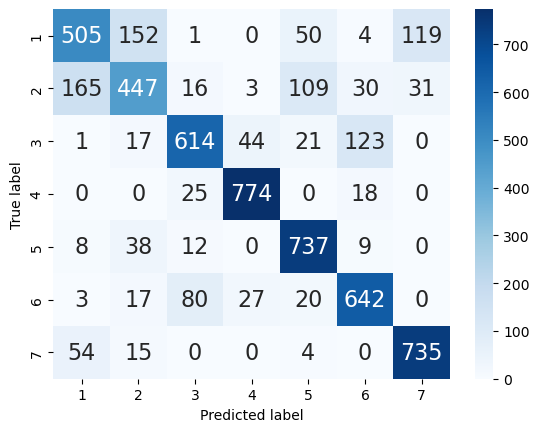

              precision    recall  f1-score   support

           1       0.69      0.61      0.64       831
           2       0.65      0.56      0.60       801
           3       0.82      0.75      0.78       820
           4       0.91      0.95      0.93       817
           5       0.78      0.92      0.84       804
           6       0.78      0.81      0.80       789
           7       0.83      0.91      0.87       808

    accuracy                           0.79      5670
   macro avg       0.78      0.79      0.78      5670
weighted avg       0.78      0.79      0.78      5670



In [84]:
## KNN Classifier with a subset of features
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_ess_train, y_train)
knn_accuracy = knn.score(X_ess_test, y_test)
y_pred = knn.predict(X_ess_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm,
    annot=True,
    cmap='Blues',
    fmt='g',
    annot_kws={'fontsize': 16},
    xticklabels=['1','2','3','4','5','6','7'],
    yticklabels=['1','2','3','4','5','6','7']
)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
print(classification_report(y_test, y_pred))

In [88]:
## KNN Classifier holdout set prediction intervals
prob_matrix = knn.predict_proba(X_ess_test)
labels = knn.classes_
intervals = category_pred_interval(prob_matrix, labels)
pred50 = intervals["pred50"]
pred80 = intervals["pred80"]
# Create a DataFrame with the true labels and the predicted 50% interval
data50 = {'True_Labels': y_test, 'Pred50': pred50}
data80 = {'True_Labels': y_test, 'Pred80': pred80}
df50 = pd.DataFrame(data50)
df80 = pd.DataFrame(data80)
cross_tab50 = pd.crosstab(df50['True_Labels'], df50['Pred50'])
print("50% Prediction Interval:")
print(cross_tab50)

# Calculate cross-tabulation for 80% interval
cross_tab80 = pd.crosstab(df80['True_Labels'], df80['Pred80'])
print("80% Prediction Interval:")
print(cross_tab80)

50% Prediction Interval:
Pred50         1    2    3    4    5    6    7
True_Labels                                   
1            505  152    1    0   50    4  119
2            165  447   16    3  109   30   31
3              1   17  614   44   21  123    0
4              0    0   25  774    0   18    0
5              8   38   12    0  737    9    0
6              3   17   80   27   20  642    0
7             54   15    0    0    4    0  735
80% Prediction Interval:
Pred80         1    2    3    4    5    6    7
True_Labels                                   
1            505  152    1    0   50    4  119
2            165  447   16    3  109   30   31
3              1   17  614   44   21  123    0
4              0    0   25  774    0   18    0
5              8   38   12    0  737    9    0
6              3   17   80   27   20  642    0
7             54   15    0    0    4    0  735
